<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:mohammad ghafourian

**Student ID**:99106493

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [2]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)
X

(569, 30)
(569,)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.2, random_state=42)
### END CODE HERE ###

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: in code below we can see with changing c value our validation accuracy change, And it doesn't have any specific way to find best value for c.I choose c=0.2 for test.

In [4]:
### START CODE HERE ###
for C in np.arange (0.05,1.05,0.05):
    clf = LogisticRegression(C=C, solver='liblinear')
    clf.fit(X_train, Y_train)
    val_acc = clf.score(X_val, Y_val)
    print(f"Validation accuracy with C={C:.2f}: {val_acc:.6f}")
for C in range (2,11):
    clf = LogisticRegression(C=C, solver='liblinear')
    clf.fit(X_train, Y_train)
    val_acc = clf.score(X_val, Y_val)
    print(f"Validation accuracy with C={C:.2f}: {val_acc:.6f}")
### END CODE HERE ###

Validation accuracy with C=0.05: 0.941748
Validation accuracy with C=0.10: 0.941748
Validation accuracy with C=0.15: 0.951456
Validation accuracy with C=0.20: 0.951456
Validation accuracy with C=0.25: 0.951456
Validation accuracy with C=0.30: 0.951456
Validation accuracy with C=0.35: 0.951456
Validation accuracy with C=0.40: 0.951456
Validation accuracy with C=0.45: 0.951456
Validation accuracy with C=0.50: 0.941748
Validation accuracy with C=0.55: 0.941748
Validation accuracy with C=0.60: 0.941748
Validation accuracy with C=0.65: 0.941748
Validation accuracy with C=0.70: 0.941748
Validation accuracy with C=0.75: 0.941748
Validation accuracy with C=0.80: 0.941748
Validation accuracy with C=0.85: 0.941748
Validation accuracy with C=0.90: 0.941748
Validation accuracy with C=0.95: 0.941748
Validation accuracy with C=1.00: 0.941748
Validation accuracy with C=2.00: 0.941748
Validation accuracy with C=3.00: 0.941748
Validation accuracy with C=4.00: 0.932039
Validation accuracy with C=5.00: 0

Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: The accuracy for test is very high, and equals to 0.982
$$\text{accuracy} = \frac{\text{number of correct predicted samples}}{\text{total number of samples}} = \frac{\sum_{i=1}^n [Y_{\text{prediction},i} = Y_{\text{test},i}]\times 1}{n}$$
and we calculate it with .score function in sklearn library.

In [23]:
### START CODE HERE ###
#for c= 0.2
clf = LogisticRegression(C=0.2, solver='liblinear')
clf.fit(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
print(f"Test accuracy with C= 0.2: {test_acc}")
### END CODE HERE ###

Test accuracy with C= 0.2: 0.9824561403508771


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

In [10]:
### START CODE HERE ###
X_2ftrain=X_train[:,0:2]
X_2fval=X_val[:,0:2]
X_2ftest=X_test[:,0:2]
print(X_2ftrain.shape)
for C in np.arange (0.05,1.05,0.05):
    clf = LogisticRegression(C=C, solver='liblinear')
    clf.fit(X_2ftrain, Y_train)
    val_acc = clf.score(X_2fval, Y_val)
    print(f"Validation accuracy with C={C:.2f}: {val_acc:.6f}")
    test_acc = clf.score(X_2ftest, Y_test)
    print(f"Test accuracy with C= {C:.2f}: {test_acc: .3f}")
for C in range (2,11):
    clf = LogisticRegression(C=C, solver='liblinear')
    clf.fit(X_2ftrain, Y_train)
    val_acc = clf.score(X_2fval, Y_val)
    print(f"Validation accuracy with C={C:.2f}: {val_acc:.6f}")
    test_acc = clf.score(X_2ftest, Y_test)
    print(f"Test accuracy with C= {C:.2f}: {test_acc: .3f}")
### END CODE HERE ###

(409, 2)
Validation accuracy with C=0.05: 0.747573
Test accuracy with C= 0.05:  0.825
Validation accuracy with C=0.10: 0.805825
Test accuracy with C= 0.10:  0.860
Validation accuracy with C=0.15: 0.805825
Test accuracy with C= 0.15:  0.895
Validation accuracy with C=0.20: 0.805825
Test accuracy with C= 0.20:  0.947
Validation accuracy with C=0.25: 0.834951
Test accuracy with C= 0.25:  0.947
Validation accuracy with C=0.30: 0.834951
Test accuracy with C= 0.30:  0.965
Validation accuracy with C=0.35: 0.834951
Test accuracy with C= 0.35:  0.965
Validation accuracy with C=0.40: 0.834951
Test accuracy with C= 0.40:  0.965
Validation accuracy with C=0.45: 0.844660
Test accuracy with C= 0.45:  0.965
Validation accuracy with C=0.50: 0.854369
Test accuracy with C= 0.50:  0.965
Validation accuracy with C=0.55: 0.834951
Test accuracy with C= 0.55:  0.982
Validation accuracy with C=0.60: 0.844660
Test accuracy with C= 0.60:  0.982
Validation accuracy with C=0.65: 0.844660
Test accuracy with C= 0.6

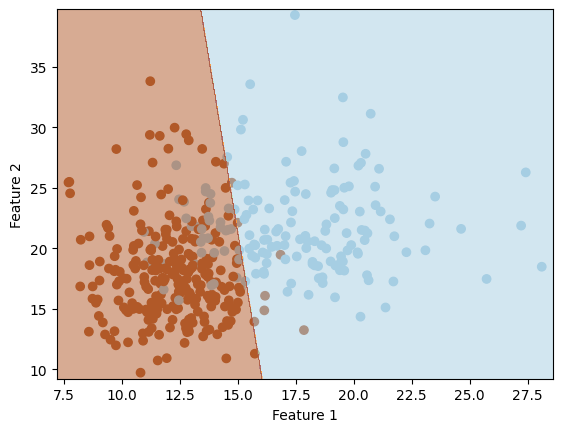

In [15]:
#c=0.8
clf = LogisticRegression(C=0.8,solver='liblinear')
clf.fit(X_2ftrain, Y_train)
x_min, x_max = X_2ftrain[:, 0].min() - 0.5, X_2ftrain[:, 0].max() + 0.5
y_min, y_max = X_2ftrain[:, 1].min() - 0.5, X_2ftrain[:, 1].max() + 0.5
xx_mesh, yy_mesh = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

pred = clf.predict(np.c_[xx_mesh.ravel(), yy_mesh.ravel()])
pred = pred.reshape(xx_mesh.shape)

plt.scatter(X_2ftrain[:, 0], X_2ftrain[:, 1], c=Y_train, cmap=plt.cm.Paired)
plt.contourf(xx_mesh, yy_mesh, pred, cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx_mesh.min(), xx_mesh.max())
plt.ylim(yy_mesh.min(), yy_mesh.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: the accuracy is 0.982

In [27]:
### START CODE HERE ###
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
test_acc1 = gnb.score(X_test, Y_test)
print(f"Test accuracy is : {test_acc1}")
### END CODE HERE ###

Test accuracy is : 0.9824561403508771


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:it is 0.9824

In [21]:
### START CODE HERE ###
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
test_acc2 = lda.score(X_test, Y_test)
print(f"Test accuracy is : {test_acc2}")
### END CODE HERE ###

Test accuracy is : 0.9649122807017544


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:in conclusion,The best method for this data are gaussian nave bayes that the accuracy is  0.98 and linear regression with similar accuracy, lda accuracy is 96.4 percent, and it's less than other methods